<P> <B> <font color=red size="6"> SGDRegressor </Font></B> </P>

<b><font color=yellow>Key Points:</font></b>
<ol>
    <li>SGDRegressor is a linear regression model optimized using gradient descent, making it efficient for large datasets and sparse data.</li>
    <li>It is sensitive to feature scaling, hence standardization is recommended.</li>
    <li>This method is a good choice when working with datasets that have many features or when you need to perform online learning.</li>

<b><font color=yellow> When NOT to Use SGDRegressor</font></b>

 <ol>   <li>
Small Datasets: For small datasets, simpler models like Ordinary Least Squares (OLS) or Ridge Regression may be more appropriate. SGDRegressor has the overhead of iterating through data, which might be unnecessary for small datasets.</li>

   
 <li>Non-linear Relationships: If your data contains non-linear relationships that cannot be captured by a linear model, SGDRegressor (being a linear model) may not perform well. In this case, other non-linear models like Random Forests or Support Vector Machines may be better.</li>


   
 <li>Model Interpretability: If you need a model with higher interpretability (e.g., a model where you can easily understand the relationships between features and the target), SGDRegressor might be less transparent than simpler linear models like Linear Regression. However, it can be interpreted if you focus on the coefficients (as in traditional linear regression).</li>


In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target (classification categories: 0, 1, 2)

In [3]:
# Convert the target to a continuous variable (for regression purposes)
y_continuous = y + 0.1 * X[:, 0]  # Adding a continuous component for regression

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_continuous, test_size=0.2, random_state=42)

In [5]:
# Standardize the features (important for gradient-based methods)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b>SGDRegressor Initialization:</b>

    max_iter=1000: The maximum number of iterations for the SGD optimization.
    tol=1e-3: Tolerance for stopping criteria. The algorithm stops if the improvement in the loss function is less than this value.
    random_state=42: Ensures reproducibility of results.

In [6]:
# Initialize the SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

In [7]:
# Fit the model
sgd_regressor.fit(X_train, y_train)


SGDRegressor(random_state=42)

In [8]:
# Make predictions
y_pred_train = sgd_regressor.predict(X_train)
y_pred_test = sgd_regressor.predict(X_test)


In [9]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [10]:
print(f"Training Mean Squared Error: {mse_train:.4f}")
print(f"Testing Mean Squared Error: {mse_test:.4f}")
print(f"Training R^2 Score: {r2_train:.4f}")
print(f"Testing R^2 Score: {r2_test:.4f}")

Training Mean Squared Error: 0.0624
Testing Mean Squared Error: 0.0700
Training R^2 Score: 0.8895
Testing R^2 Score: 0.8710


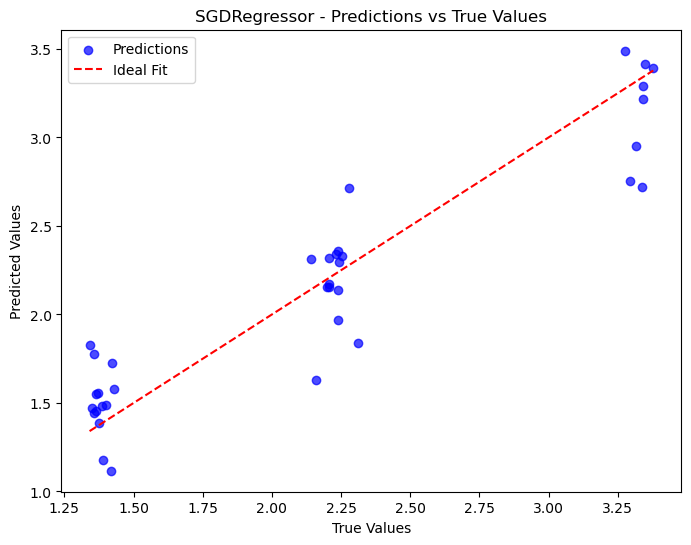

In [11]:
# Visualize predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, c='blue', alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('SGDRegressor - Predictions vs True Values')
plt.legend()
plt.show()